In [2]:
import numpy as np
import matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/Users/eddie/Downloads/Log In - AgInjuryNews (1).xlsx - Sheet1 (1) - Log In - AgInjuryNews (1).xlsx - Sheet1 (1).csv')

X = pd.DataFrame(dataset.iloc[:,:18].values)
Y = pd.DataFrame(dataset.iloc[:,18:].values)
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(Y_train.shape)

features = pd.DataFrame(dataset.iloc[:,:18])
features = features.columns
print(features)

      0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0      3   2   2  25   0   3  10   0   0   0   0   0   0   0   0   0   1   1
1      3   3   1  61   0   3  10   0   0   0   0   0   0   0   0   0   7   1
2      3   3   1  65   0   3  10   0   0   0   0   0   0   0   0   0   6   1
3      3   2   1  49   0   3  10   0   0   0   1   0   0   0   0   0   5   1
4      3   1   1  54   0   5   2   1   1   0   0   0   0   0   0   1   5   1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
3414   1   2   1  57   0   6   7   0   0   0   0   0   0   0   0   0   1   4
3415   1   1   1  24   0   3   7   0   0   0   0   0   0   0   0   0   1   4
3416   1   1   1  50   0   3  10   0   0   0   0   0   0   0   0   0   6   4
3417   1   2   1  58   0   3   9   0   0   0   0   0   0   0   0   0   6   4
3418   1   2   1   3   0   4  10   0   0   0   0   0   0   0   0   0   5   4

[3419 rows x 18 columns]
      0
0     0
1     1
2     1
3     0
4     1
..

In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier 

In [4]:
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
def objective(max_depth, min_samples_split,min_samples_leaf):
    model = DecisionTreeClassifier(max_depth = int(max_depth),
                                  min_samples_split =int( min_samples_split), min_samples_leaf = int(min_samples_split))
    
    return cross_val_score(model, X_train, Y_train, cv=10,scoring = 'roc_auc').mean()
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2,50),
    'min_samples_leaf':(1,50)
}
optimizer = BayesianOptimization(f=objective, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=15)
best_params = optimizer.max['params']

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.5993    | 8.116     | 47.59     | 37.14     |
| 2         | 0.577     | 12.37     | 8.645     | 9.488     |
| 3         | 0.5664    | 2.104     | 43.44     | 30.85     |
| 4         | 0.5961    | 14.45     | 2.009     | 48.56     |
| 5         | 0.5781    | 16.82     | 11.4      | 10.73     |
| 6         | 0.5891    | 10.15     | 48.9      | 39.26     |
| 7         | 0.6006    | 8.232     | 50.0      | 34.5      |
| 8         | 0.5874    | 11.87     | 46.81     | 33.14     |
| 9         | 0.6067    | 4.466     | 50.0      | 37.26     |
| 10        | 0.5525    | 1.11      | 50.0      | 41.96     |
| 11        | 0.6063    | 4.401     | 50.0      | 34.21     |
| 12        | 0.6012    | 9.625     | 6.205     | 49.43     |
| 13        | 0.5912    | 11.77     | 6.853     | 44.25     |
| 14        | 0.6092    | 7.809     | 1.086     | 50.0      |
| 15    

In [5]:
# Initialize Random Forest regressor
model = DecisionTreeClassifier(min_samples_split = int(best_params['min_samples_split']), min_samples_leaf = int(best_params['min_samples_leaf']), max_depth = int(best_params['max_depth']) ,random_state=42)

# Train the model
model.fit(X_train, Y_train)




DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=42)

In [6]:
print(int(best_params['min_samples_split']))
print(int(best_params['min_samples_leaf']))
print(int(best_params['max_depth']))

50
1
7


In [7]:
res = model.predict(X_test)
print(res)
print(Y_test)

[1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [8]:
res = np.array(res)
print(res)

[1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [9]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,res)
print(accuracy)
from sklearn.metrics import classification_report
print(classification_report(Y_test,res,digits=6))

0.5935672514619883
              precision    recall  f1-score   support

           0   0.441624  0.341176  0.384956       255
           1   0.655031  0.743590  0.696507       429

    accuracy                       0.593567       684
   macro avg   0.548328  0.542383  0.540731       684
weighted avg   0.575471  0.593567  0.580358       684



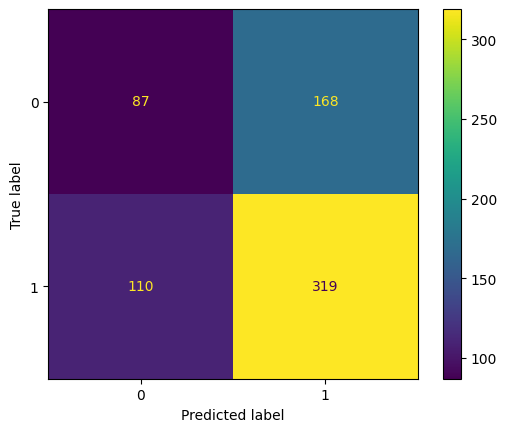

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confusionmatrix = confusion_matrix(Y_test, res)
cm_display = ConfusionMatrixDisplay(confusionmatrix, display_labels=[0,1])
cm_display.plot()

In [11]:
import shap
explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values,X_train,feature_names = features,plot_type="bar", plot_size=(20,15),show=False)

c:\Users\eddie\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


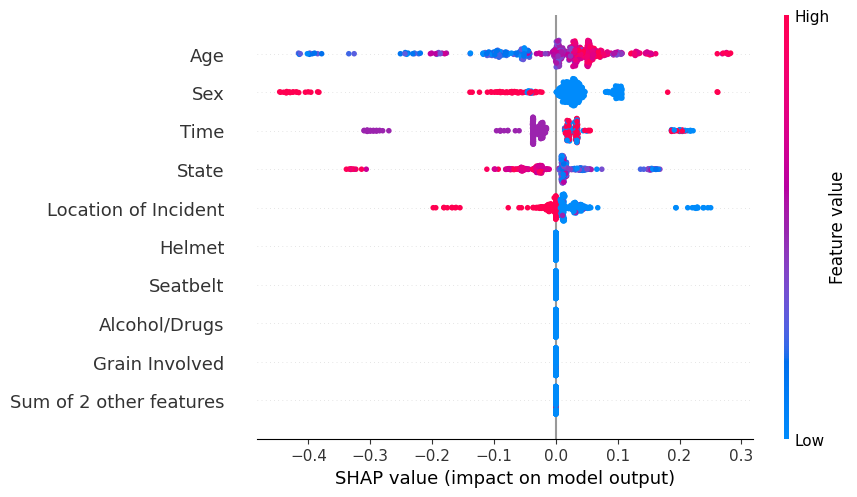

In [ ]:
explanation = shap.Explanation(
    values=shap_values, 
    feature_names=features
)
shap.plots.beeswarm(explanation)